<div>
Olá, Wail!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está muito bom e possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Aplicação adequada de algoritmos de agrupamento
- Uso adequado de gráficos e estatísticas descritivas

Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
   
<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>

# Customer Interaction & Retention Strategy.

The Model Fitness Gym chain is developing a customer interaction strategy based on analytical data.

One of the most common problems that gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate turnover based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a customer has left: they can sneak out.

Turnover indicators varies from area to area. If a user buys from an online store rarely but regularly, you can't say you're a runaway. But if for two weeks they didn't open the channel that is updated daily, that's a reason to worry: your follower may have been upset and left you.

For a gym, it makes sense to say that customers have left if they haven't shown up in a month. Of course, it is possible that they are in Cancun and will come to frequent again when they return, but this is not a common case. Usually, if a customer joins, comes a few times, then disappears, they probably won't come back.

Instead of struggling with churn, Model Fitness digitized a portion of customer profiles. Your task is to analyze them and come up with a customer retention strategy.

You must:

* Learn how to predict the likelihood of churn (for the next month) for each customer
* Draw portraits of typical users: select the most striking groups and describe their main characteristics
* Analyze the factors that most impact turnover
* Draw basic conclusions and develop recommendations on how to improve customer service:
    - Identify target groups
    - Suggest measures to decrease turnover
    - Describe any other patterns you see regarding customer interactions

## Download data

### Initialization

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

### Load Data

In [34]:
# Laod data
gym_churn = pd.read_csv('/datasets/gym_churn_us.csv')

print(gym_churn.shape)
gym_churn.sample(5)

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1048,1,1,0,0,1,12,1,34,112.889425,12.0,1,1.137338,1.115163,0
3657,1,1,0,0,1,1,1,37,400.075044,1.0,1,0.298545,0.357077,0
211,1,1,0,0,1,1,1,25,139.984692,1.0,0,2.375718,1.831002,1
3169,1,1,0,0,0,1,0,28,107.857984,1.0,10,1.346217,1.313234,0
3404,0,1,1,1,1,12,1,32,115.117983,11.0,2,2.006230,2.002304,0


### Check for missing values and data types.

In [35]:
# Checking for missing values
gym_churn.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

As we can see no missing values included and th datatype of each columns is in the correct form to continue the analysis.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente
- Os imports foram feitos corretamente, porém considere executar os comandos em células separadas para isolar a execução do código
- O método `head()` foi usado para exibir uma amostra do conjunto de dados
- Sugestão: aqui você poderia converter os nomes das colunas para `lowercase`
</div>

## Perform exploratory data analysis (EDA)

### Study the mean of values and standard deviation (use the describe())

In [36]:
# Descriptive statistics
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


We can analyse that:

The client base is relatively young, with a balanced distribution between two genders and largely local.

Most clients have provided their phone numbers, and a sizable number have partner affiliations.

Contract periods and membership lifetimes vary widely, indicating a mixed profile of short-term and long-term users.

Attendance frequency and additional charges also vary greatly, hinting at different usage behaviors.

The churn rate is relatively low, but high variability in features like contract length, lifetime, and attendance could help identify patterns leading to churn.

### Observe the average of the average values of the characteristics in two groups: for those who stayed (use the method groupby())

In [37]:
# Grouping by 'Churn' and calculating mean values for each group
churn_group_means = gym_churn.groupby('Churn').mean()

print("Mean values for groups (Stayed vs. Churned):")
churn_group_means

Mean values for groups (Stayed vs. Churned):


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Based on the results we can say that:

The gender ratio is similar across both groups (0.51), indicating that gender is not a distinguishing factor in customer retention.

The high mean value for both groups suggests that most clients live near the fitness center, suggesting that being nearby helps with retention.

A greater proportion of clients who stayed engage with partner promotions compared to those who churned. This indicates that effective promotional strategies could play a role in retaining clients.

Clients who remained are more likely to utilize friend-related promotions. This indicates that social dynamics and peer influence can play a role in encouraging loyalty among members.

Both groups exhibit similar levels of phone communication access, implying that this variable does not serve as a differentiator in retention rates.

The average contract duration for clients who stayed is significantly longer than that of those who churned. This correlation suggests that longer commitment periods are associated with increased retention, highlighting the importance of fostering long-term client relationships.

Clients who stayed participate more in group visits, indicating that engagement in group activities may enhance client retention.

The churned clients tend to be younger on average. This may indicate a trend where younger members are more transient, leading to higher turnover rates.

Clients who churned incur lower additional charges on average, suggesting that perceptions of value may influence their decision to leave the gym. This could indicate a need for reassessing pricing strategies to enhance perceived value.

Clients who remain with the gym generally have more time remaining on their contracts, which could be linked to a greater sense of commitment and stability in their membership.

There is a stark contrast in average lifetime duration, with clients who stayed having significantly longer memberships. This underscores the importance of nurturing long-term relationships to enhance retention rates.

Higher attendance in classes among clients who stayed suggests that regular participation in gym activities is closely associated with retention. Engaging members through consistent class offerings may strengthen their loyalty.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As características dos usuários que cancelaram vs usuários ativos foram analisadas
- As conclusões foram apresentadas
</div>

### Make bar histograms and characteristic distributions for those who left (churned) and those who stayed

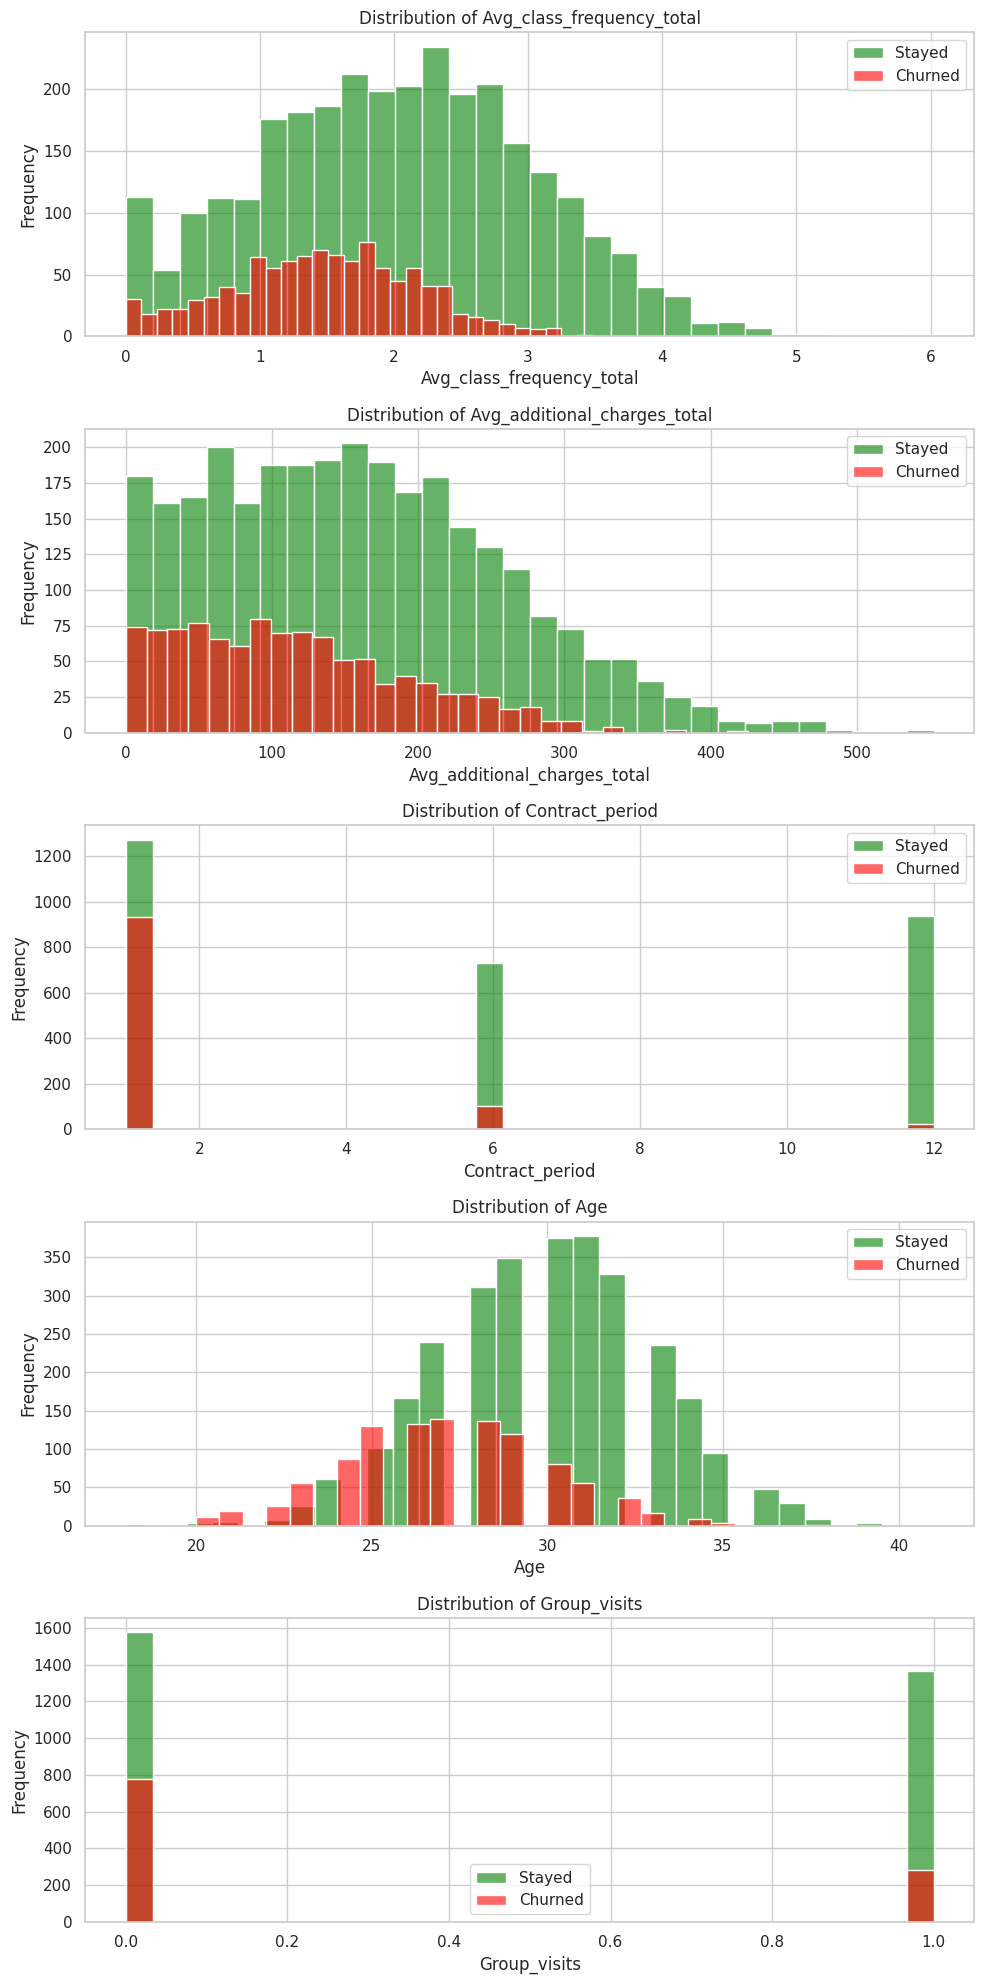

In [38]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# List of characteristics to plot
characteristics = [
    'Avg_class_frequency_total',
    'Avg_additional_charges_total',
    'Contract_period',
    'Age',
    'Group_visits'
]


# Create subplots for each characteristic
fig, axes = plt.subplots(nrows=len(characteristics), ncols=1, figsize=(10, 20))

# Initialize index for subplot
index = 0

# Create histograms for each characteristic
for characteristic in characteristics:
    sns.histplot(gym_churn[gym_churn['Churn'] == 0][characteristic], bins=30, color='green', label='Stayed', ax=axes[index], alpha=0.6)
    sns.histplot(gym_churn[gym_churn['Churn'] == 1][characteristic], bins=30, color='red', label='Churned', ax=axes[index], alpha=0.6)
    axes[index].set_title(f'Distribution of {characteristic}')
    axes[index].set_xlabel(characteristic)
    axes[index].set_ylabel('Frequency')
    axes[index].legend()
    
    # Increment the index for the next subplot
    index += 1

plt.tight_layout()
plt.show()

* Avg_class_frequency_total:

Clients who stayed tend to have higher class frequency overall, centered around 2-3 times per month.

Clients who churned show a broader spread but peak around 1-2 times per month, indicating lower overall engagement.

* Avg_additional_charges_total:

Both groups generally show a decline as the charges increase.

However, clients who stayed are more represented across higher additional charges, suggesting that those who invest more in additional services (e.g., classes, products) are more likely to stay.

* Contract_period:

The distribution is clustered around the main contract periods: 1 month, 6 months, and 12 months.

Clients with a 1-month contract show higher churn, whereas those with 6 or 12 months contracts tend to stay more.

* Age:

The age distribution for clients who stayed peaks around 29 years old.

Churned clients show a similar peak but are more evenly distributed across younger ages (20-25), implying that younger clients may have a higher churn rate.

* Group_visits:

The majority of clients do not engage in group visits, regardless of staying or leaving.

However, there is still a significant portion of stayed clients that engaged in group visits while a small portion of churned clients who participated in group visits (1.0).

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A distribuição das features para clientes que ficaram e clientes que saíram foram analisadas. Como sugestão, você poderia plotar as figuras lado a lado para facilitar a comparação das distribuições
- As conclusões foram apresentadas
</div>

### Build the correlation matrix and display it

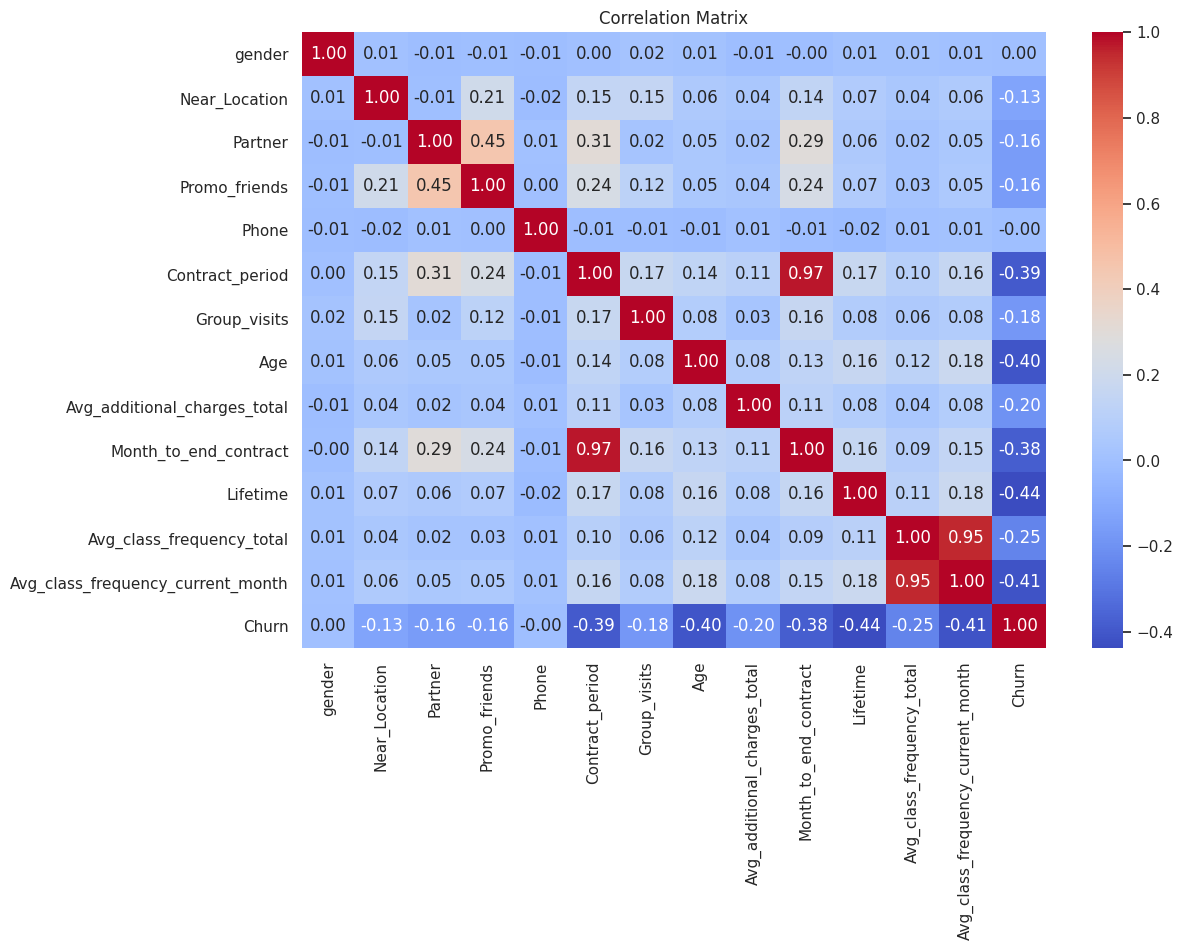

In [39]:
# Calculate correlation matrix
correlation_matrix = gym_churn.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante calculou a correlação entre os atributos numéricos!
</div>

## Build a model to predict customer churn

Build a binary classification model for clients where the objective variable is the next month's user output

### Split training and validation data into two sets using the train_test_split()

In [40]:
X = gym_churn.drop('Churn', axis=1)
y = gym_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
print(X_train.shape, X_test.shape)

(3200, 13) (800, 13)


### Train the model in the set with two methods:

In [41]:
#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
# Train the model
log_model.fit(X_train, y_train)

#Random Forest
rf_model = RandomForestClassifier(random_state=0)
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Evaluate accuracy, precision, and sensitivity for both models using validation data. Use them to compare models. Which model yielded better results?

In [42]:
# Predictions
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Metrics Evaluation
print("Logistic Regression - Accuracy:", accuracy_score(y_test, log_pred))
print("Logistic Regression - Precision:", precision_score(y_test, log_pred))
print("Logistic Regression - Sensitivity:", recall_score(y_test, log_pred))

print("Random Forest - Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest - Precision:", precision_score(y_test, rf_pred))
print("Random Forest - Sensitivity:", recall_score(y_test, rf_pred))

Logistic Regression - Accuracy: 0.91625
Logistic Regression - Precision: 0.8729281767955801
Logistic Regression - Sensitivity: 0.7821782178217822
Random Forest - Accuracy: 0.9175
Random Forest - Precision: 0.8617021276595744
Random Forest - Sensitivity: 0.801980198019802


We can express that:

Both models have very similar accuracy, around 91.6% to 91.7%, which means that roughly this percentage of predictions (both churned and non-churned clients) are correct. Random Forest has a slightly higher accuracy, but the difference is very minimal.

Precision measures how many of the clients predicted as churned are actually churned. Logistic Regression has a slightly higher precision (87.3%) compared to Random Forest (86.2%), meaning it's a bit better at avoiding false positives (incorrectly predicting a client as churned when they're not).

Sensitivity (or recall) measures how many actual churned clients are correctly identified by the model. The Random Forest has a higher sensitivity (80.2%) compared to Logistic Regression (78.2%), indicating that it is better at catching true positives (correctly identifying actual churned clients).

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram normalizados usando `StandardScaler()`
- Os modelos Regressão Logística e Random Forest foram utilizados
- As métricas de performance dos modelos foram calculadas
- A acurácia de pelo menos `0.78` foi alcançada
</div>

## Create customer groupings

Define columns with data on churn and identify groupings of the object (customer):

### Standardize data

In [43]:
# Drop the 'Churn' column, as it is the objective variable
features = gym_churn.drop(columns=['Churn'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to scale it
scaled_features = scaler.fit_transform(features)

# Check the scaled data (5 rows)
scaled_features[:5]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851],
       [-1.0207145 ,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
         1.60882159,  1.19403206,  1.17120844, -0.87472237,  1.83194105,
        -0.46008079,  1.36465509,  1.51045005],
       [ 0.97970588,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
        -0.8092194 , -0.83749845, -0.97737548,  0.5336998 , -0.79287273,
        -0.19332863, -0.78707638, -0.61454183]])

### Use the linkage() to construct the distance matrix based on the standardized trait matrix and construct a dendrogram. Notice: rendering the dendrogram can take a while! Use the resulting chart to estimate the number of groupings you can highlight

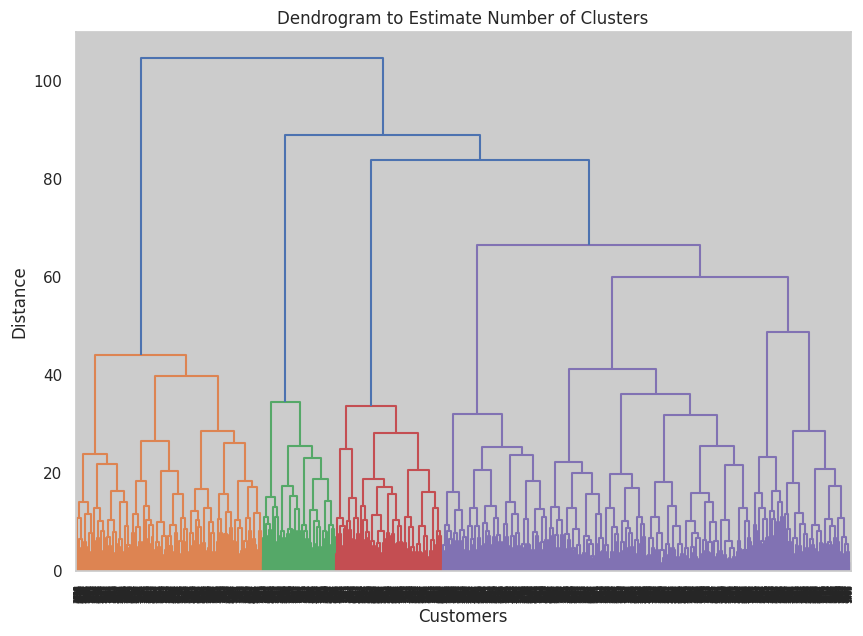

In [44]:
# Generate the linkage matrix using the 'ward' method
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram to Estimate Number of Clusters')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

Looking at the dendrogram, a good point to cut seems to be at around a distance of 60. At this level, you can observe about 4 or 5 clusters.

Cutting higher (at a distance of 80 or above) would result in only 2 or 3 clusters, which may be too few for meaningful customer segmentation.

The dendrogram suggests that there are clusters of varying sizes, with some smaller, tighter groups (e.g., the green cluster in the middle) and some larger, more spread-out groups (e.g., the orange and purple clusters).

Smaller clusters might represent more homogeneous groups of customers, while larger clusters might indicate more variability within them.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram padronizados
- O agrupamento hierárquico foi executado
- O dendograma foi criado
- A função `linkage()` foi utilizada para construir a matriz de distâncias
</div>

### Train the clustering model with the K-means algorithm and predict client clusterings (n=5)

In [45]:
# Initialize the KMeans model with n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model and predict clusters
gym_churn['Cluster'] = kmeans.fit_predict(scaled_features)

# Preview the dataset with the cluster labels
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


### Look at the average values of the characteristics for groupings. Nothing catches your eye?

In [46]:
# Calculate the average values for each feature per cluster
cluster_means = gym_churn.groupby('Cluster').mean()

cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


Cluster 3 has a very high churn rate (57.29%). This group has the lowest average class frequency, both overall (1.225) and in the current month (0.967), which suggests low engagement. It has the shortest contract period (1.91 months on average), which could indicate that members in this group are on short-term plans and are more likely to churn. Also has the lowest frequency of group visits (0.276), which may point to low social involvement.

Cluster 2 has the lowest churn rate (2.20%). Members are more likely to have longer contracts (11.85 months on average). Also shows higher additional charges and this cluster also has higher group visit participation (0.546), which could indicate higher social involvement.

Cluster 0 and Cluster 4 have moderate churn rates (24.64% and 26.68%). Both clusters have average characteristics in terms of contract periods, additional charges, and class frequency. Cluster 4 stands out for having no phone contacts, which might impact customer engagement or follow-ups.

Cluster 1 has a lower churn rate (8.99%). This group is less likely to join with friends (only 5.29%), but they still have relatively low churn, which may suggest that they are driven by other factors, like loyalty or satisfaction with the service. Their average class frequency is higher (2.745), indicating higher engagement.

### Make characteristic distributions for the groupings. Did you notice anything?

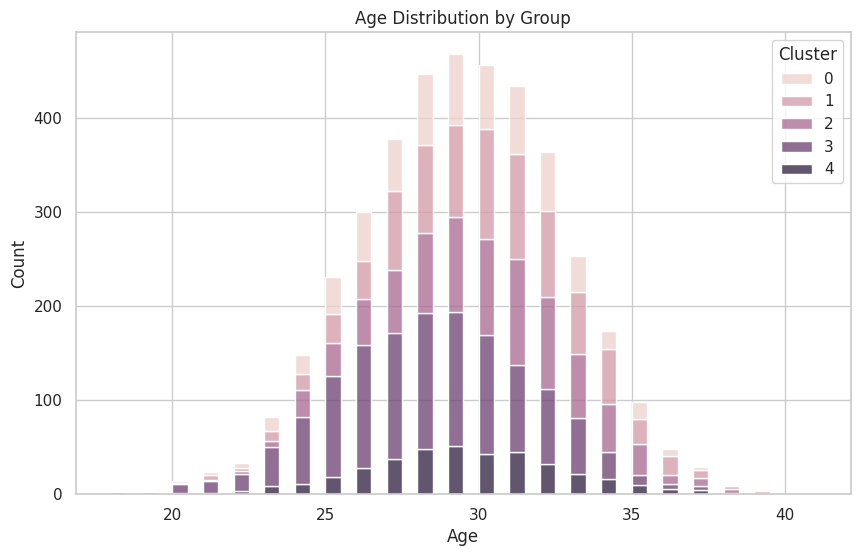

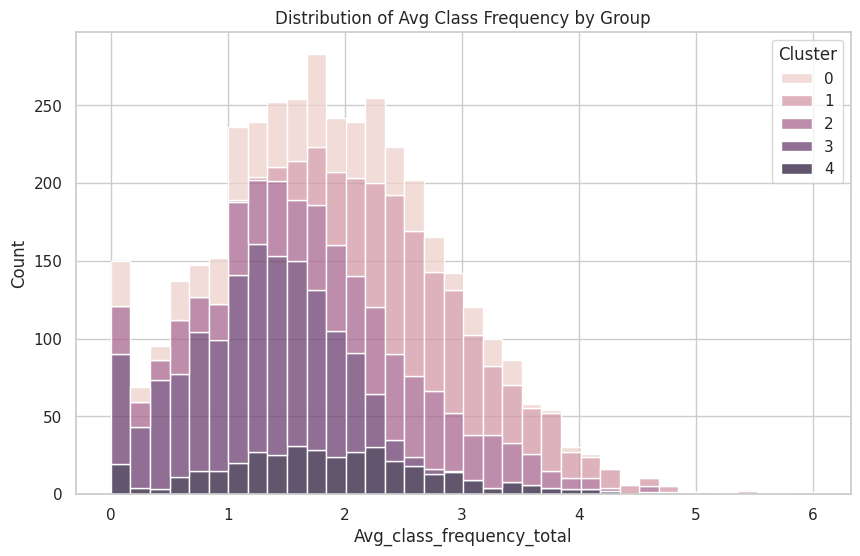

In [47]:
#We will create characteristic distributions (histograms) for the clusters to visually explore differences.
#We can pick a few key features like Age, Avg_class_frequency_total

plt.figure(figsize=(10,6))
sns.histplot(data=gym_churn, x='Age', hue='Cluster', multiple='stack')
plt.title('Age Distribution by Group')

plt.figure(figsize=(10,6))
sns.histplot(data=gym_churn, x='Avg_class_frequency_total', hue='Cluster', multiple='stack')
plt.title('Distribution of Avg Class Frequency by Group')
plt.show()

In the Age Distribution chart we can notice that:

Cluster 0 and Cluster 1 seem to have a higher representation in younger age groups (early 20s to mid-30s). Clusters 3 and 4, which are represented by darker shades, tend to have a slightly older population concentrated between 28 to 35 years old.

This could suggest that certain clusters (like 3 and 4) may include slightly older individuals, while others (like 0 and 1) lean towards a younger demographic.

In the Class Frequency chart:

The distribution of the average class attendance per week varies across clusters.

Clusters 0 and 1 show a higher proportion of individuals with lower attendance rates (0 to 2 classes per week). This suggests that these clusters are less active. Cluster 3 (darker purple) has a slightly higher attendance frequency, with more individuals attending 2-4 classes per week.

Clusters 3 and 4 may represent more engaged or active users based on their higher average class attendance, while clusters 0 and 1 have more customers with low engagement.

Insights:

Clusters 0 and 1: Likely younger, less active users with lower class attendance frequency.

Clusters 3 and 4: Older, more engaged users who attend more classes.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os grupos foram gerados utilizando K-means
- Os clusters foram analisados e as observações foram apresentadas
</div>

### Calculate the churn rate for each grouping (use the groupby()). Do they differ in terms of churn rate? Which groupings are likely to leave, and which are loyal?

In [48]:
# Calculate churn rate for each cluster
churn_rate_per_cluster = gym_churn.groupby('Cluster')['Churn'].mean()

# Display the churn rates
print(churn_rate_per_cluster)

Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


From the results above we can say that:

Cluster 3 is the most likely to churn and requires immediate attention for retention.

Clusters 0 and 4 also show moderate churn risk, but are more stable.

Cluster 1 is mostly loyal, and Cluster 2 is highly loyal with almost no churn.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A rotatividade média foi calculada por grupo (`cluster`)
</div>

## Conclusions and basic recommendations about working with clients

* Conclusion

The analysis reveals that the client base of the gym chain is predominantly young, with a balanced gender distribution and a local demographic profile.

While the overall churn rate remains relatively low, significant variability in engagement behaviors, contract lengths, and additional charges highlights the importance of tailored retention strategies. Clients who stay longer tend to participate more in classes, engage in group activities, and take advantage of promotional offers, particularly those related to partnerships.

In contrast, younger clients show higher churn rates, especially those in shorter contracts, emphasizing the need for more flexible offerings.

Cluster analysis indicates that Cluster 3 requires immediate attention due to its high churn rate, while Clusters 0 and 4, though more stable, also present moderate churn risks. Clusters 1 and 2 demonstrate loyalty, suggesting that fostering long-term relationships is crucial for overall retention.

* Recommendations

To improve client retention and engagement, it is essential to implement targeted strategies that focus on high-risk clusters, particularly Cluster 3.

Initiatives such as personalized communication, enhanced promotional offers, and community-building activities can encourage participation and strengthen member loyalty. Additionally, offering incentives for longer contract commitments may appeal to younger clients seeking flexibility. Regular check-ins through phone communication will help address concerns and improve satisfaction among disengaged members.

Finally, continuously monitoring client feedback and churn patterns will enable the gym to adapt strategies and maintain a strong, engaged membership base.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

As conclusões finais e recomendações foram apresentadas!
</div>